### Importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
plt.rcParams['figure.figsize'] = [15, 10]     


def genData(param):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	return a

# Build a modular dynamic learning system
1. Modules process data at different levels of abstraction
2. Will be able to cope with new unseen data 
3. Take the best choise to minimize energy and maximize entripy

### Input Data Generation

In [2]:
############# input sensor data generation ############

d =  [ [0,0,1,0],  [1,0,0,0] , [0,0,1,1] , [0,1,1,0] ] 
p=[10, 20, 10, 20]
pp=[p[0]]
for i in range(0,len(p)-1):
    pp.append(pp[i]+p[i+1])
print(pp)

N =100
inputChargeSensor = []
da = genData( [ "uniform", 0,100, N])
#print(da)
for i in range(N):
    assigned = 0
    for j in range(len(pp)):
        if(da[i]<pp[j]) : 
            inputChargeSensor.append(d[j])
            assigned = 1
            break
    if (assigned==0):
        #print("Not assigned "+ str(i))
        da1 = genData( [ "uniform", 0,1, 4])
        da1 = da1<0.5
        da1 = [int(val) for val in da1]
        #print(da1)
        inputChargeSensor.append(da1)
#print(inputChargeSensor)
        

[10, 30, 40, 60]


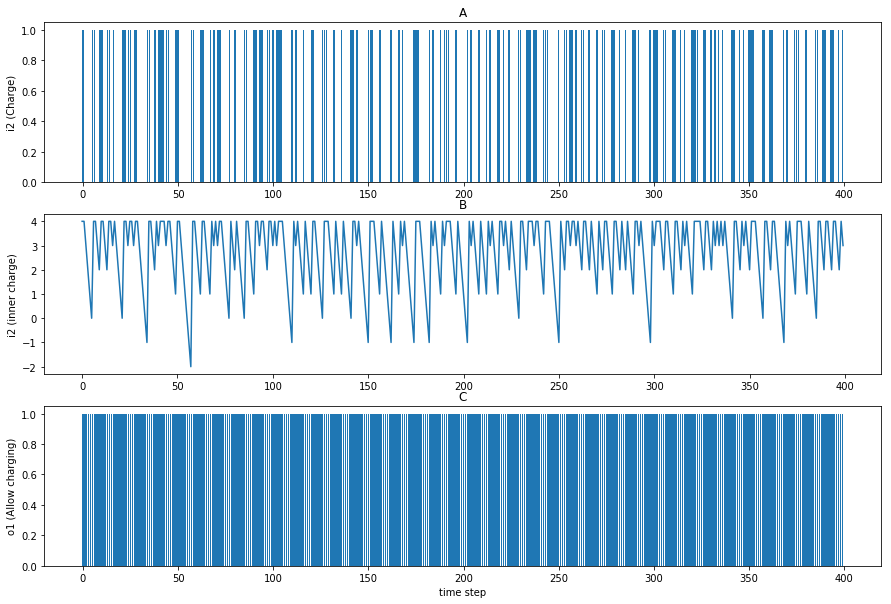

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]    
#inputChargeSensor =d1*10
data1= inputChargeSensor
data1 = [val for sublist in data1 for val in sublist]
############# input inner sensor data generation ##########
actual_energy = 4
energy=[]
for i in range(len(data1)):    
    energy.append(actual_energy)
    if(data1[i]==1):
        actual_energy =4
    else:
        actual_energy = actual_energy-1


############# input data plot ############
plt.subplot(3, 1, 1)
plt.bar(range(0,len(data1)),data1)
plt.ylabel('i2 (Charge)')
plt.title('A')

    
plt.subplot(3, 1, 2)
plt.plot(energy)
plt.title('B')

plt.ylabel('i2 (inner charge)')

plt.subplot(3, 1, 3)
plt.bar(range(0,len(data1)),np.ones(len(energy)))
#plt.title('Energy Level')
plt.xlabel('time step')
plt.ylabel('o1 (Allow charging)')
plt.title('C')

plt.show()


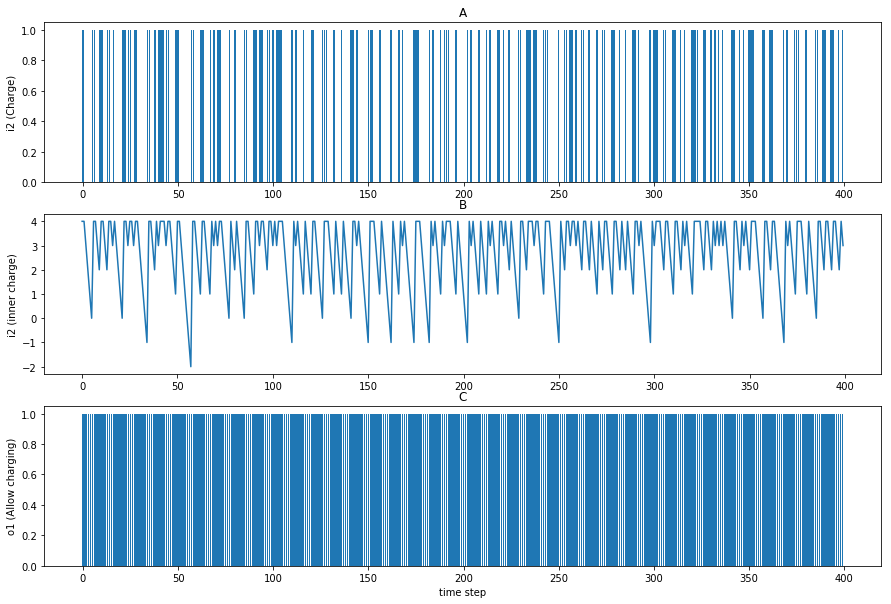

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]    
#inputChargeSensor =d1*10
data1= inputChargeSensor
data1 = [val for sublist in data1 for val in sublist]
############# input inner sensor data generation ##########
actual_energy = 4
energy=[]
for i in range(len(data1)):    
    energy.append(actual_energy)
    #if(data1[i]==1):
        actual_energy =4
    else:
        actual_energy = actual_energy-1


############# input data plot ############
plt.subplot(3, 1, 1)
plt.bar(range(0,len(data1)),data1)
plt.ylabel('i2 (Charge)')
plt.title('A')

    
plt.subplot(3, 1, 2)
plt.plot(energy)
plt.title('B')

plt.ylabel('i2 (inner charge)')

plt.subplot(3, 1, 3)
plt.bar(range(0,len(data1)),np.ones(len(energy)))
#plt.title('Energy Level')
plt.xlabel('time step')
plt.ylabel('o1 (Allow charging)')
plt.title('C')

plt.show()


# Learning Model components:
### Decomposer :
Decomposer will take input from two sensors: input charge and inner charge.
Decomposer will transform the incomming input data to a type that will be usable in the following layers
### Abstract :
Abstract will take as input the decomposed input data.
It will build a decision tree from the incomming parameters based on time or 
From input data we obtain abstract values
### Context :
Context will take abstract values and will build a conditional relationship between different abstracts
Context will always have a status. The Status will change based on comming abstract values
### Decider :
Decider will have inputs from all the layers

## Decomposer:
System is fed from two different sensors:
    1. Input Charge Sensor Data is a binary data, either charge or no charge. 
    2. Inner Charge Data: the state of current charge of the system, can take a value between 0 and Max_Charge. 
When Inner Charge is euqal to zero, the system stops and restarts, taking the firs

In [ ]:

def decompose(input_s):
    
for i in range(len(inputChargeSensor)):

## Abstract
This layer 

0 food
16 food
28 food
36 food
72 food
80 food
104 food
108 food
112 food
116 food
128 food
132 food
136 food
144 food
152 food
156 food
160 food
164 food
168 food
176 food
180 food
184 food
192 food
196 food
200 food
204 food
208 food
224 food
244 food
248 food
264 food
268 food
280 food
292 food
296 food
312 food
316 food
328 food
336 food
352 food
376 food
380 food


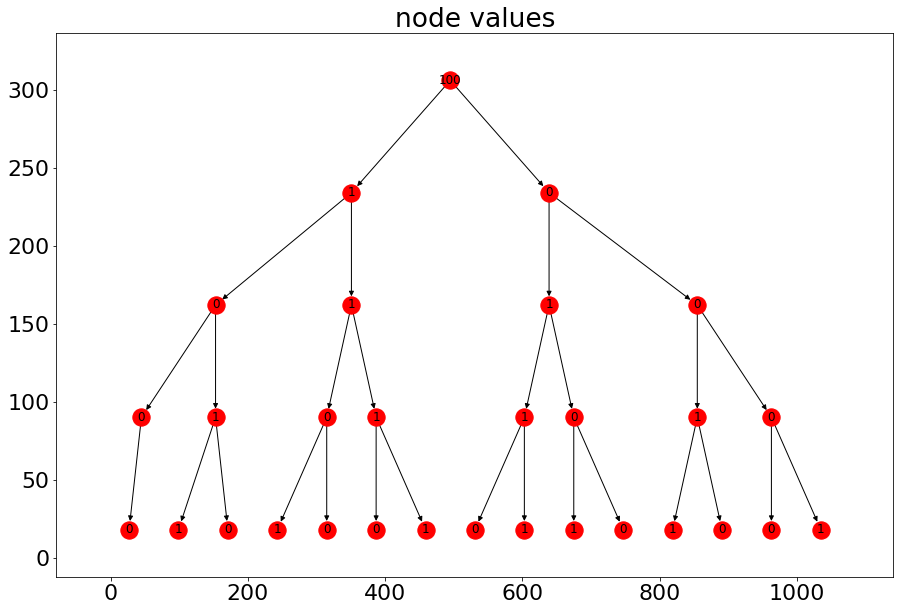

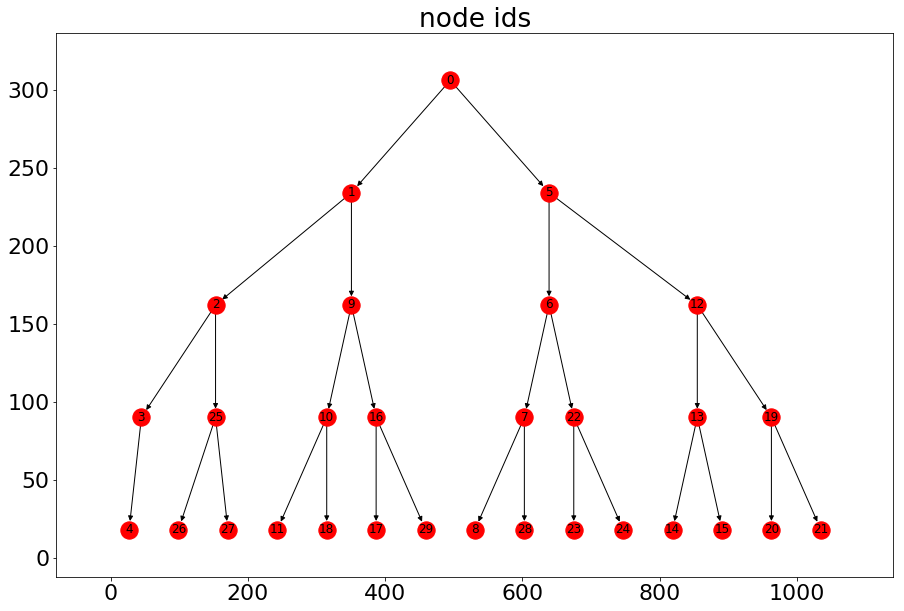

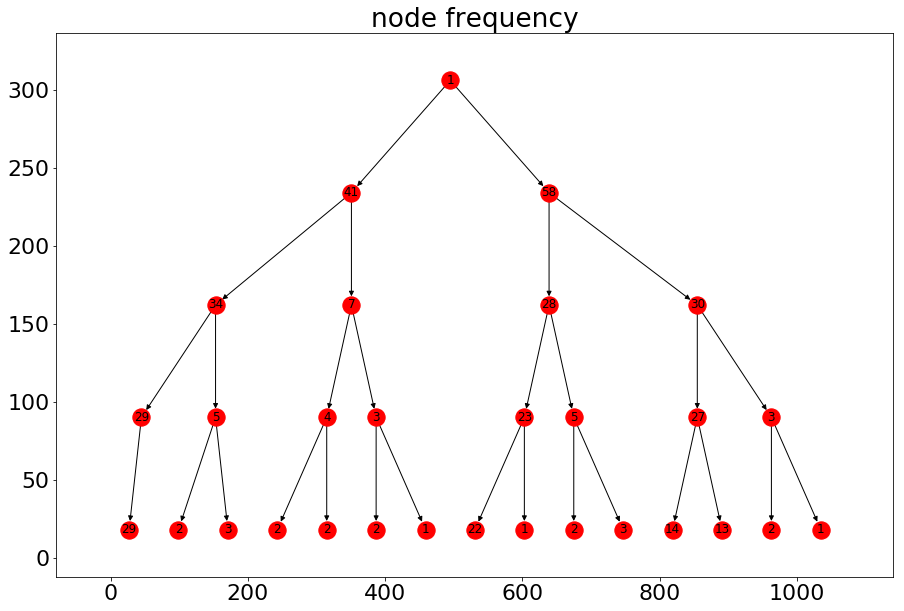

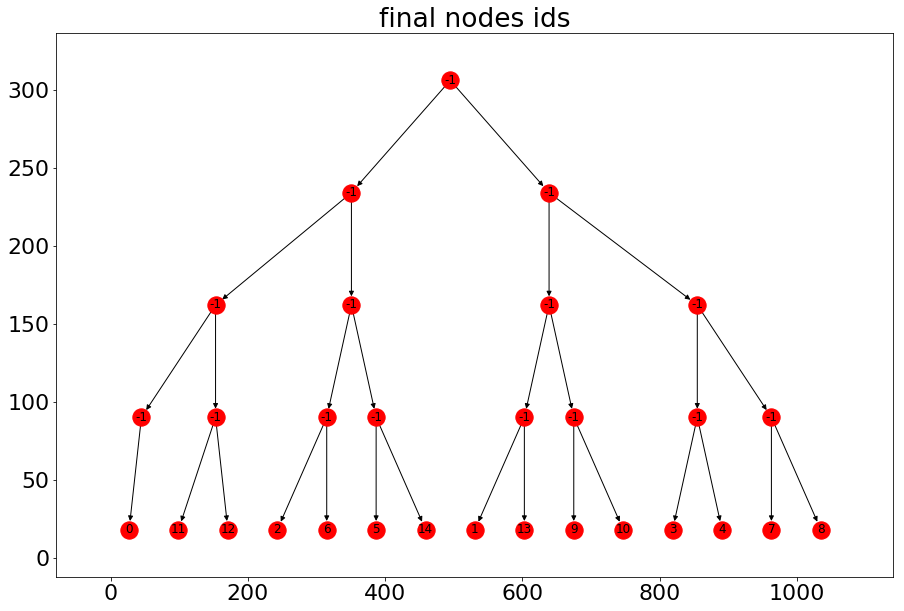

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

GG=nx.DiGraph()

counter = 0
GG.add_node(counter, k=100,cc=1, id = -1,food =0)
counter = counter+1
poz = 0
#print(len(data1)/WL)
WL = 4 # window length
overlap = 0# int(WL/5)
step = WL-overlap

for i in range(0,len(data1)-step, step):
    if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
        print(str(i)+ " food")
    poz=0
    for j in range(WL):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['k']==d):
                    k=n
                    break
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1

plt.rcParams['figure.figsize'] = [15, 10]        
labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
#pos=nx.graphviz_layout(GG, prog='dot')
pos =graphviz_layout(GG, prog='dot')
#nx.spring_layout(GG)

plt.title("node values")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

plt.title("node ids")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
plt.show()

plt.title("node frequency")
labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

finalNodes = [] 
for i in range(1, counter):
    yol =  nx.shortest_path(GG,0,i)
    if(len(yol) >WL):
        GG.node[yol[-1]]['id']=len(finalNodes)
        finalNodes.append(yol[-1])
        
plt.title("final nodes ids")
labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()    